<a href="https://colab.research.google.com/github/User-Galih/capstone-project-bengkod/blob/main/Capstone_Project_14359_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

# Load dataset dari Google Drive
file_path = '/content/drive/MyDrive/Semester 6/BengKod/ObesityDataSet.csv'  # Sesuaikan dengan lokasi file di Google Drive
df = pd.read_csv(file_path)

Mounted at /content/drive


# **1. EDA**

## Pada tahap awal, dilakukan pengecekan informasi dasar dataset. Ditemukan bahwa dataset memiliki 2111 baris data dan 17 kolom (16 fitur dan 1 target). Masalah utamanya adalah semua kolom terdeteksi sebagai tipe data object (teks), padahal kolom seperti Age dan Weight seharusnya berupa angka. Pemeriksaan lebih lanjut juga menunjukkan adanya data yang hilang, baik dalam bentuk standar (NaN) maupun dalam bentuk teks ('?').



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [3]:
# Menampilkan semua nilai unik dari semua kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Nilai unik:")
    print(df[col].unique())
    print(f"Total nilai unik: {df[col].nunique(dropna=True)}")


    #Menampilkan jumlah NaN dan ? (missing values)
    print(f"Jumlah data kosong (NaN): {df[col].isna().sum()}, jumlah '?' sebagai missing: {(df[col] == '?').sum()}")



Kolom: Age
Nilai unik:
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']
Total nilai unik: 1394
Jumlah data kosong (NaN): 14, jumlah '?' sebagai missing: 8

Kolom: Gender
Nilai unik:
['Female' 'Male' '?' nan]
Total nilai unik: 3
Jumlah data kosong (NaN): 9, jumlah '?' sebagai missing: 13

Kolom: Height
Nilai unik:
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']
Total nilai unik: 1562
Jumlah data kosong (NaN): 12, jumlah '?' sebagai missing: 10

Kolom: Weight
Nilai unik:
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']
Total nilai unik: 1518
Jumlah data kosong (NaN): 11, jumlah '?' sebagai missing: 8

Kolom: CALC
Nilai unik:
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
Total nilai unik: 5
Jumlah data kosong (NaN): 5, jumlah '?' sebagai missing: 15

Kolom: FAVC
Nilai unik:
['no' 'yes' '?' nan]
Total nilai unik: 3
Jumlah data kosong (NaN): 11, jumlah '?' sebagai missing: 11

Kolom: FCVC
Nilai unik:
['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979

##**Pembersihan dan Konversi Tipe Data**
## Berdasarkan temuan EDA, dilakukan proses pembersihan data. Delapan kolom yang seharusnya bersifat numerik (Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE) dikonversi menjadi tipe data angka. Proses ini secara cerdas mengubah semua nilai teks atau simbol yang tidak valid menjadi data kosong (NaN), sehingga seluruh data yang hilang menjadi seragam.



In [4]:
# 1. Konversi kolom yang seharusnya numerik
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')  # Konversi ke numerik, ganti error jadi NaN


## Setelah konversi, informasi dataset diverifikasi kembali. Hasilnya, dataset kini memiliki struktur yang benar: 8 kolom numerik (float64) dan 9 kolom kategorikal (object). Dengan tipe data yang sudah sesuai dan data hilang yang terstandarisasi, dataset menjadi jauh lebih bersih dan siap untuk tahap analisis visualisasi serta pemodelan machine learning.

In [5]:
# 2. Tampilkan beberapa baris pertama untuk memastikan konversi tipe data berhasil
print("Beberapa baris pertama dari dataset:")
print(df.head())

Beberapa baris pertama dari dataset:
    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

 

In [6]:
# 3. Informasi umum dataset
print("\nInformasi Umum Dataset:")
print(df.info())


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF      

In [7]:
# 4. Deskripsi data
print("\nDeskripsi Statistik Dataset:")
print(df.describe(include='all'))


Deskripsi Statistik Dataset:
                Age Gender       Height       Weight       CALC  FAVC  \
count   2089.000000   2102  2089.000000  2092.000000       2106  2100   
unique          NaN      3          NaN          NaN          5     3   
top             NaN   Male          NaN          NaN  Sometimes   yes   
freq            NaN   1056          NaN          NaN       1386  1844   
mean      24.717928    NaN     1.706623    88.608184        NaN   NaN   
std        8.391323    NaN     0.117700    36.154617        NaN   NaN   
min       14.000000    NaN     1.450000    39.000000        NaN   NaN   
25%       19.955257    NaN     1.630000    66.000000        NaN   NaN   
50%       22.814657    NaN     1.701284    83.000000        NaN   NaN   
75%       26.000000    NaN     1.770000   108.055736        NaN   NaN   
max      106.441252    NaN     2.853986   441.131078        NaN   NaN   

               FCVC          NCP   SCC SMOKE         CH2O  \
count   2093.000000  2089.000000

## Analisis dan Visualisasi Data (EDA Lanjutan) Setelah data bersih dan tipe datanya benar, analisis dilanjutkan untuk memahami distribusi dan karakteristik data lebih dalam. Dari kode tersebut, ditemukan bahwa ada beberapa data yang hilang (missing values) dan duplikat yang perlu ditangani nanti. Selanjutnya, dilakukan tiga visualisasi utama:
* ## Distribusi Fitur Numerik (Histogram): Visualisasi ini menunjukkan sebaran data untuk setiap fitur angka seperti Age dan Weight. Dari sini bisa terlihat apakah datanya cenderung normal, miring ke kiri/kanan, atau memiliki pola distribusi lainnya.
*  ## Distribusi Kelas Target (Count Plot): Grafik ini menampilkan jumlah data untuk setiap kategori obesitas. Hal ini penting untuk memeriksa keseimbangan kelas, dan hasilnya menunjukkan bahwa jumlah data untuk setiap kategori cukup seimbang, yang baik untuk proses pemodelan.
* ## Deteksi Outlier (Boxplot): Boxplot digunakan untuk mengidentifikasi adanya outlier atau nilai pencilan pada fitur-fitur numerik. Outlier adalah data yang nilainya sangat jauh berbeda dari sebagian besar data lainnya dan bisa memengaruhi performa model.


In [8]:
# 5. Cek keberadaan missing values
print("\nMissing Values:")
print(df.isnull().sum())
# 6. Cek data duplikat
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())
# 7. Cek nilai unik per kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Nilai unik:")
    print(df[col].unique())
    print(f"Total nilai unik: {df[col].nunique(dropna=True)}")


    # Menampilkan jumlah NaN dan ? (missing values)
    print(f"Jumlah data kosong (NaN): {df[col].isna().sum()}, jumlah '?' sebagai missing: {(df[col] == '?').sum()}")



Missing Values:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah Data Duplikat:
18

Kolom: Age
Nilai unik:
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
Total nilai unik: 1393
Jumlah data kosong (NaN): 22, jumlah '?' sebagai missing: 0

Kolom: Gender
Nilai unik:
['Female' 'Male' '?' nan]
Total nilai unik: 3
Jumlah data kosong (NaN): 9, jumlah '?' sebagai missing: 13

Kolom: H

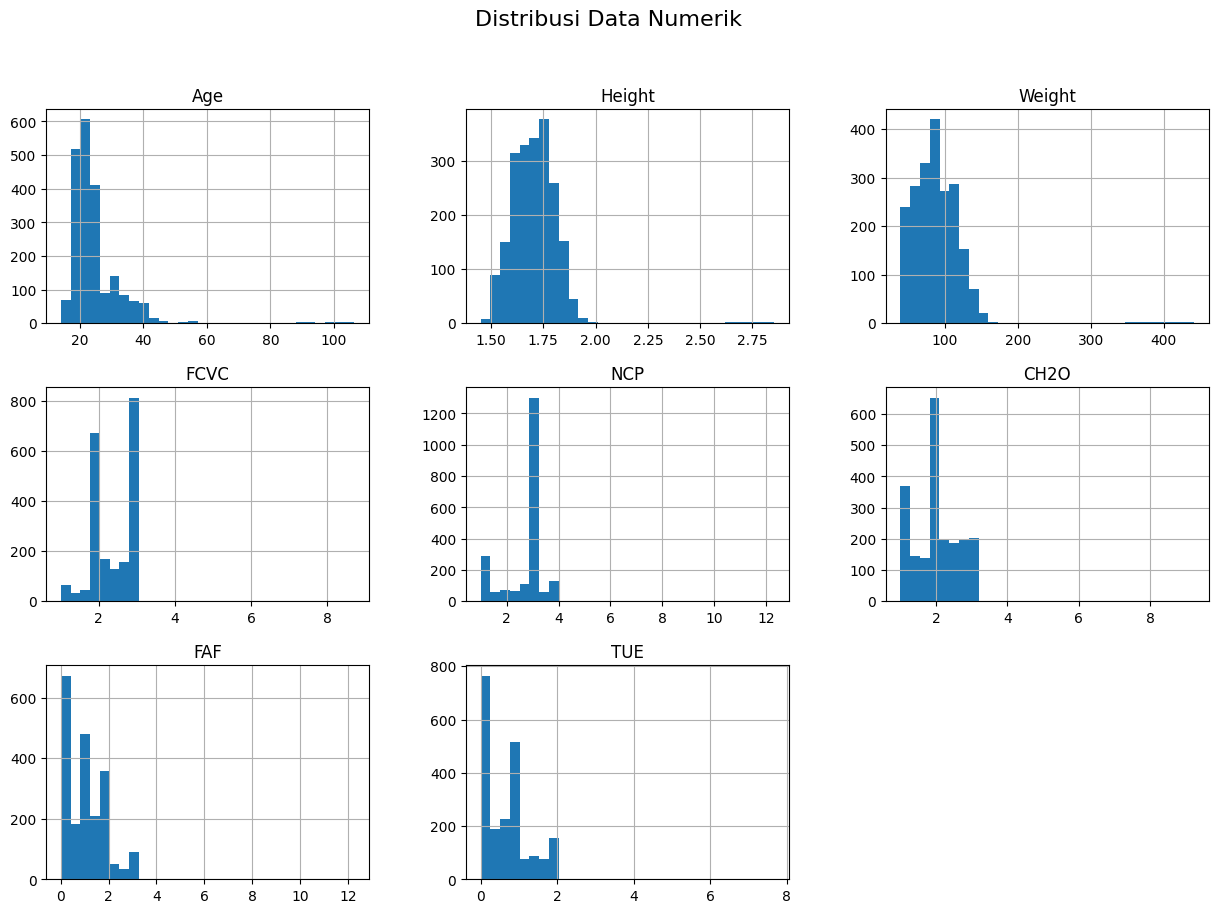

In [9]:
# 8. Visualisasi distribusi data numerik
df[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribusi Data Numerik", fontsize=16)
plt.show()

<ipython-input-10-2476460960>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', palette='Set2')


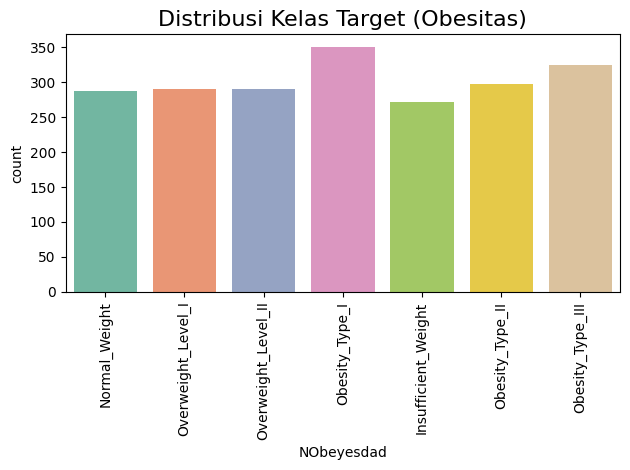

In [10]:
# 9. Visualisasi distribusi kategori target (NObeyesdad)
sns.countplot(data=df, x='NObeyesdad', palette='Set2')
plt.title('Distribusi Kelas Target (Obesitas)', fontsize=16)
plt.xticks(rotation=90)  # Rotasi label menjadi vertikal
plt.tight_layout()  # Untuk memastikan layout tidak terpotong
plt.show()


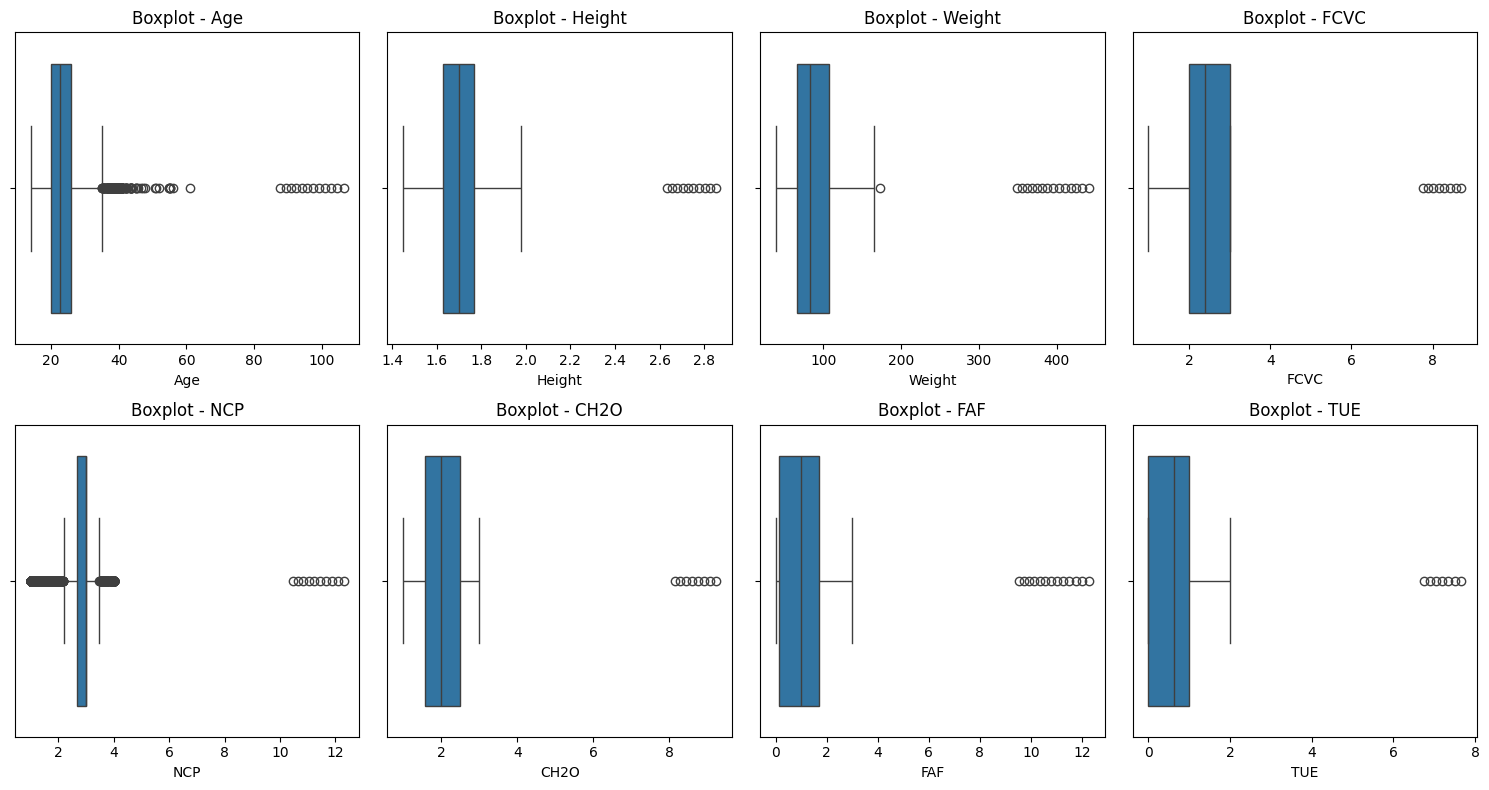

In [11]:
# 10. Deteksi outlier menggunakan boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

In [12]:
# 11. Keseimbangan Data - Perbandingan jumlah tiap kategori target
print("\nKeseimbangan Data (NObeyesdad):")
print(df['NObeyesdad'].value_counts())


Keseimbangan Data (NObeyesdad):
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


# **2. Preprocessing**

## Berdasarkan wawasan dari tahap analisis, data kemudian disiapkan untuk pemodelan melalui beberapa langkah pra-pemrosesan:
* ## Penanganan Data Hilang dan Duplikat: Pertama, semua data hilang, termasuk yang berbentuk teks ('?'), diseragamkan menjadi format NaN. Kemudian, nilai NaN pada kolom numerik diisi dengan nilai median (nilai tengah) dan pada kolom kategorikal diisi dengan modus (nilai yang paling sering muncul). Setelah itu, 20 baris data duplikat yang ditemukan berhasil dihapus, menghasilkan dataset yang bersih tanpa ada nilai kosong ataupun duplikasi.
* ## Penanganan Outlier: Selanjutnya, outlier pada fitur numerik ditangani menggunakan metode Interquartile Range (IQR). Nilai-nilai yang dianggap ekstrem (terlalu jauh dari rentang data utama) akan disesuaikan atau "ditarik" kembali ke batas atas atau batas bawah yang wajar. Seperti yang terlihat pada visualisasi boxplot setelahnya, langkah ini berhasil mengurangi pengaruh nilai pencilan tanpa harus menghapus data.

In [13]:
import numpy as np

# 1. Tangani missing values (termasuk nilai '?')

# Ganti semua nilai '?' menjadi np.nan (agar bisa diproses sebagai missing value)
df.replace('?', np.nan, inplace=True)

# Tentukan kolom numerik
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Isi NaN pada kolom numerik dengan median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Tentukan kolom kategorikal (selain kolom numerik)
categorical_columns = [col for col in df.columns if col not in numerical_columns]

# Isi NaN pada kolom kategorikal dengan modus (most frequent value)
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [14]:
print("Jumlah data awal:", len(df))
print("Jumlah data duplikat:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Jumlah data setelah duplikat dihapus:", len(df))


Jumlah data awal: 2111
Jumlah data duplikat: 20
Jumlah data setelah duplikat dihapus: 2091


In [15]:
# 6. Cek keberadaan missing values
print("\nMissing Values:")
print(df.isnull().sum())
# 7. Cek data duplikat
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())
# 8. Cek nilai unik per kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Nilai unik:")
    print(df[col].unique())
    print(f"Total nilai unik: {df[col].nunique(dropna=True)}")


    # Menampilkan jumlah NaN dan ? (missing values)
    print(f"Jumlah data kosong (NaN): {df[col].isna().sum()}, jumlah '?' sebagai missing: {(df[col] == '?').sum()}")



Missing Values:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Jumlah Data Duplikat:
0

Kolom: Age
Nilai unik:
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
Total nilai unik: 1393
Jumlah data kosong (NaN): 0, jumlah '?' sebagai missing: 0

Kolom: Gender
Nilai unik:
['Female' 'Male']
Total nilai unik: 2
Jumlah data kosong (NaN): 0, jumlah '?' sebagai missing: 0

Kolom: Height
Nilai unik:
[1.62     

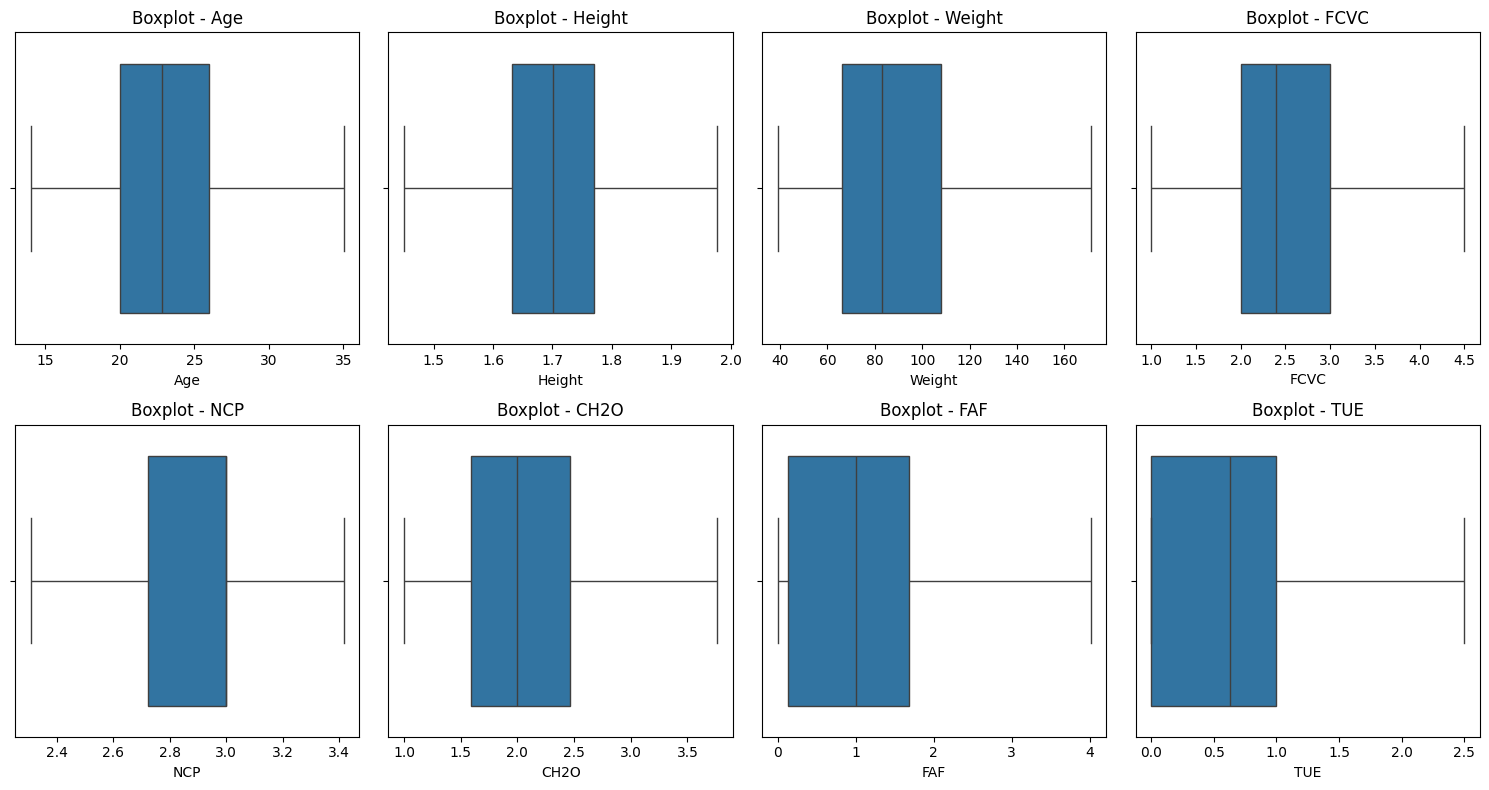

In [16]:
# 3. Tangani outlier (gunakan IQR method untuk kolom numerik)
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Menampilkan boxplot setelah penanganan outlier
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

In [17]:
print("\nInformasi Umum Dataset:")
print(df.info())


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 2091 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2091 non-null   float64
 1   Gender                          2091 non-null   object 
 2   Height                          2091 non-null   float64
 3   Weight                          2091 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2091 non-null   object 
 6   FCVC                            2091 non-null   float64
 7   NCP                             2091 non-null   float64
 8   SCC                             2091 non-null   object 
 9   SMOKE                           2091 non-null   object 
 10  CH2O                            2091 non-null   float64
 11  family_history_with_overweight  2091 non-null   object 
 12  FAF           

## Encoding Fitur Kategorikal (Feature Encoding) Tahap krusial selanjutnya adalah mengubah semua kolom kategorikal yang masih berbentuk teks menjadi format numerik. Langkah ini wajib dilakukan karena analisis statistik (seperti korelasi) dan model machine learning hanya dapat memproses data dalam bentuk angka. Menggunakan LabelEncoder, setiap nilai unik pada fitur (misalnya, 'Female', 'Male') dan target (NObeyesdad) diubah menjadi representasi angka (0, 1, 2, ...). Dengan selesainya tahap ini, seluruh dataset menjadi sepenuhnya numerik, sehingga memungkinkan dilakukannya tahap-tahap berikutnya seperti analisis korelasi, normalisasi, dan resampling.

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- 1. Encoding Fitur-Fitur Kategorikal (Bukan Target) ---

# Daftar fitur yang akan di-encode (tanpa target)
feature_columns = [
    'Gender',
    'CALC',
    'FAVC',
    'SCC',
    'SMOKE',
    'family_history_with_overweight',
    'CAEC',
    'MTRANS'
]

print("--- Memulai Proses Encoding untuk Fitur ---")

# Loop melalui setiap kolom fitur, encode, dan tampilkan hasilnya
for col in feature_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

    print(f"\n========================================")
    print(f"✅ Hasil untuk fitur: '{col}'")
    print("========================================")

    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Peta Nilai Otomatis: {mapping}")

    print("\nValue Counts (diurutkan berdasarkan nilai 0, 1, 2, ...):")
    print(df[col].value_counts().sort_index())

# --- 2. Encoding Fitur Target (NObeyesdad) ---

print("\n\n--- Memulai Proses Encoding untuk Target ---")

target_col = 'NObeyesdad'
le_target = LabelEncoder()

df[target_col] = le_target.fit_transform(df[target_col])

print(f"\n========================================")
print(f"🎯 Hasil untuk Target: '{target_col}'")
print("========================================")

target_mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
print(f"Peta Nilai Otomatis: {target_mapping}")

print("\nValue Counts (diurutkan berdasarkan nilai 0, 1, 2, ...):")
print(df[target_col].value_counts().sort_index())


# --- Hasil Akhir ---
print("\n\n--- Proses Selesai. Tampilan 5 baris pertama data: ---")
print(df.head())

--- Memulai Proses Encoding untuk Fitur ---

✅ Hasil untuk fitur: 'Gender'
Peta Nilai Otomatis: {'Female': np.int64(0), 'Male': np.int64(1)}

Value Counts (diurutkan berdasarkan nilai 0, 1, 2, ...):
Gender
0    1029
1    1062
Name: count, dtype: int64

✅ Hasil untuk fitur: 'CALC'
Peta Nilai Otomatis: {'Always': np.int64(0), 'Frequently': np.int64(1), 'Sometimes': np.int64(2), 'no': np.int64(3)}

Value Counts (diurutkan berdasarkan nilai 0, 1, 2, ...):
CALC
0       1
1      70
2    1389
3     631
Name: count, dtype: int64

✅ Hasil untuk fitur: 'FAVC'
Peta Nilai Otomatis: {'no': np.int64(0), 'yes': np.int64(1)}

Value Counts (diurutkan berdasarkan nilai 0, 1, 2, ...):
FAVC
0     243
1    1848
Name: count, dtype: int64

✅ Hasil untuk fitur: 'SCC'
Peta Nilai Otomatis: {'no': np.int64(0), 'yes': np.int64(1)}

Value Counts (diurutkan berdasarkan nilai 0, 1, 2, ...):
SCC
0    1995
1      96
Name: count, dtype: int64

✅ Hasil untuk fitur: 'SMOKE'
Peta Nilai Otomatis: {'no': np.int64(0), 'yes':

## Analisis Korelasi Setelah semua data menjadi numerik, dilakukan analisis korelasi untuk mengukur hubungan statistik antar variabel. Analisis ini dibagi menjadi dua bagian:
* ## Korelasi Antar Fitur (Heatmap): Pertama, dibuat sebuah heatmap untuk melihat seberapa kuat hubungan antar sesama fitur (tanpa menyertakan target). Ini berguna untuk mendeteksi jika ada fitur-fitur yang saling terkait sangat kuat (multikolinearitas).
* ## Korelasi Fitur dengan Target (Bar Plot): Kedua, dihitung korelasi antara setiap fitur dengan target NObeyesdad. Dari hasil yang ditampilkan, terlihat bahwa fitur seperti Weight dan family_history_with_overweight memiliki hubungan positif terkuat dengan tingkat obesitas. Analisis ini sangat berguna untuk memberikan gambaran awal mengenai fitur-fitur mana yang paling berpengaruh dan berpotensi menjadi faktor penentu yang baik dalam model.

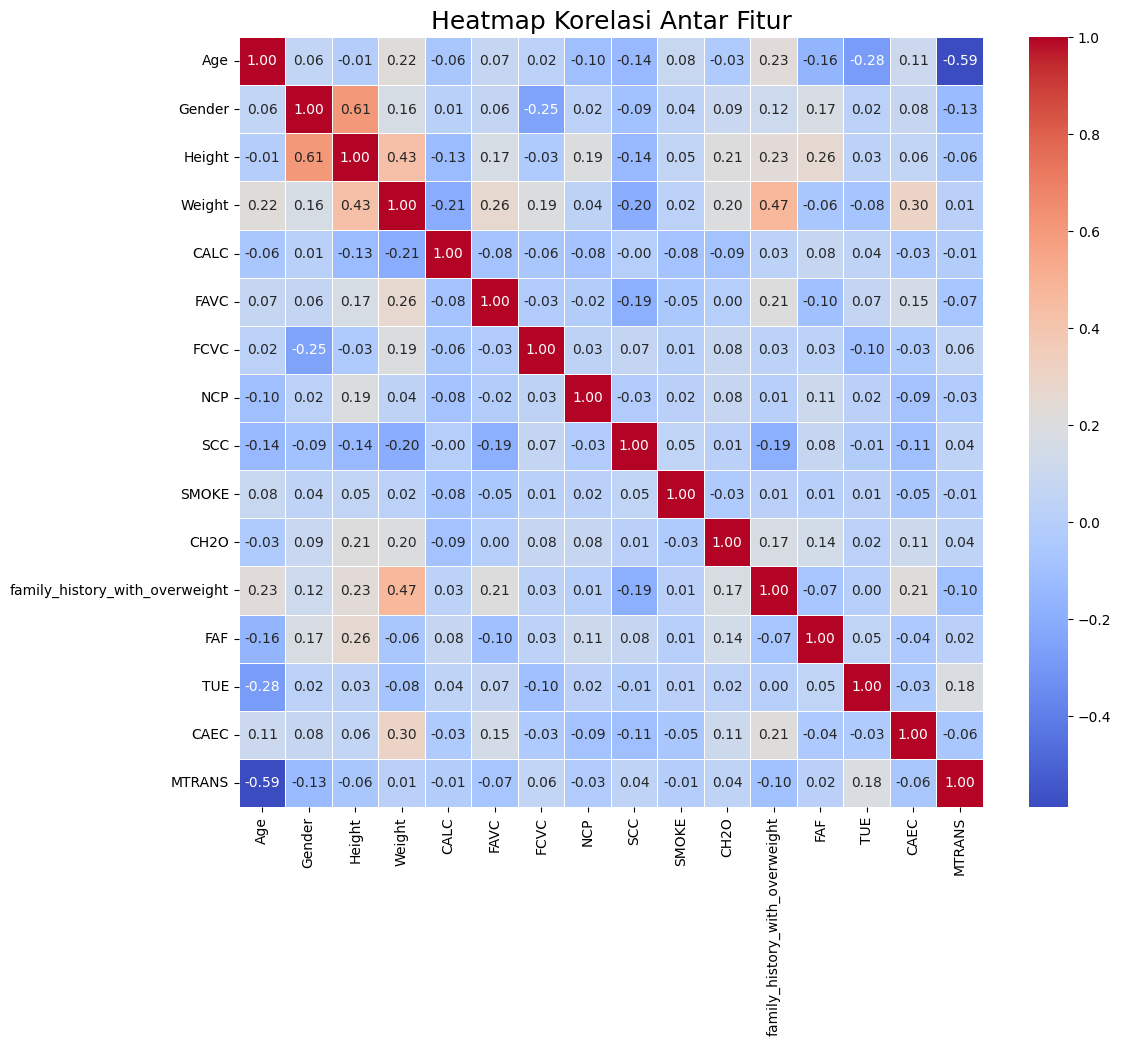

In [19]:
# Membuat matriks korelasi antar fitur (tidak termasuk target)
# Drop kolom target 'NObeyesdad' untuk menghitung korelasi antar fitur saja
feature_df = df.drop(columns=['NObeyesdad'])

correlation_matrix = feature_df.corr()

# Menampilkan heatmap dari matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Fitur', fontsize=18)
plt.show()


📊 Korelasi Setiap Fitur dengan Target (NObeyesdad)
NObeyesdad                        1.000000
Weight                            0.378161
family_history_with_overweight    0.333460
CAEC                              0.315886
Age                               0.260521
CH2O                              0.086476
Height                            0.041737
FAVC                              0.040055
FCVC                              0.020399
Gender                            0.013663
SMOKE                            -0.022940
MTRANS                           -0.047365
SCC                              -0.050309
TUE                              -0.062906
NCP                              -0.126316
CALC                             -0.131053
FAF                              -0.137807
Name: NObeyesdad, dtype: float64


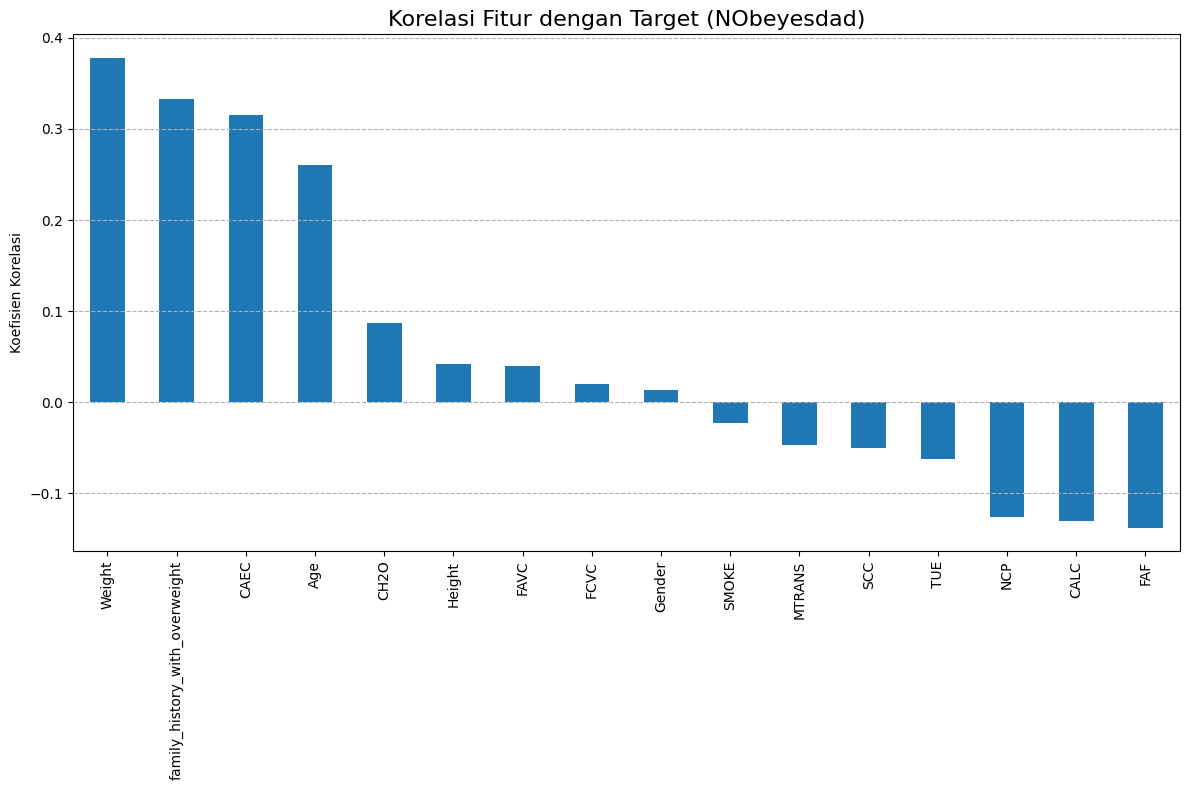

In [20]:
# Membuat matriks korelasi antara semua fitur dan target
# Korelasi antara fitur numerik dan target yang sudah di-encode
# Fitur kategorikal yang sudah di-encode juga bisa dimasukkan karena sudah berupa angka

correlation_with_target = df.corr()['NObeyesdad'].sort_values(ascending=False)

# Menampilkan korelasi
print("\n========================================")
print("📊 Korelasi Setiap Fitur dengan Target (NObeyesdad)")
print("========================================")
print(correlation_with_target)

# Visualisasi korelasi dengan bar plot (opsional)
plt.figure(figsize=(12, 8))
correlation_with_target.drop('NObeyesdad').plot(kind='bar') # Hilangkan korelasi target dengan dirinya sendiri
plt.title('Korelasi Fitur dengan Target (NObeyesdad)', fontsize=16)
plt.ylabel('Koefisien Korelasi')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## **Penanganan Ketidakseimbangan Kelas (SMOTE)**
## Meskipun pada analisis awal distribusi kelas target terlihat cukup merata, masih terdapat sedikit perbedaan jumlah data antar kategori (ada kelas dengan 269 data, ada yang 351). Untuk memastikan model tidak cenderung "pilih kasih" pada kelas dengan data lebih banyak, diterapkan teknik oversampling yang disebut SMOTE (Synthetic Minority Over-sampling Technique).

## SMOTE bekerja secara cerdas dengan membuat data sintetis (data buatan) baru yang karakteristiknya mirip dengan data pada kelas-kelas yang jumlahnya lebih sedikit. Proses ini menaikkan jumlah sampel pada kelas-kelas minoritas hingga jumlahnya setara dengan kelas mayoritas. Seperti yang ditunjukkan pada hasil, setelah SMOTE diterapkan, semua kategori target kini memiliki jumlah data yang sama persis, yaitu 351 sampel per kelas, sehingga data menjadi seimbang sempurna.

<ipython-input-21-21995946>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', palette='Set2')


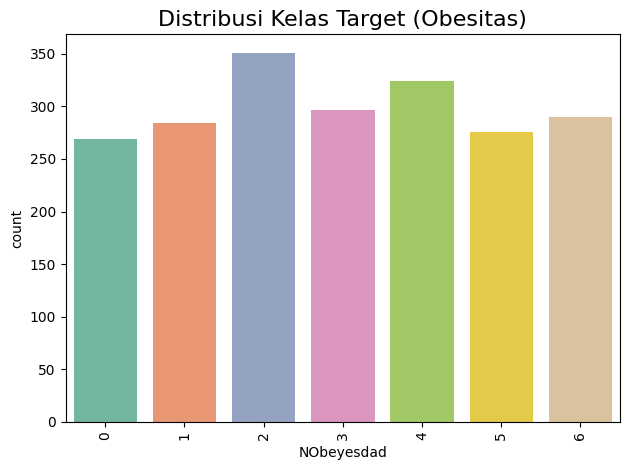

In [21]:
# 10. Visualisasi distribusi kategori target (NObeyesdad)
sns.countplot(data=df, x='NObeyesdad', palette='Set2')
plt.title('Distribusi Kelas Target (Obesitas)', fontsize=16)
plt.xticks(rotation=90)  # Rotasi label menjadi vertikal
plt.tight_layout()  # Untuk memastikan layout tidak terpotong
plt.show()


In [22]:
from imblearn.over_sampling import SMOTE

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Sebelum SMOTE: {y.value_counts().to_dict()}")
print(f"Setelah SMOTE: {pd.Series(y_resampled).value_counts().to_dict()}")


Sebelum SMOTE: {2: 351, 4: 324, 3: 297, 6: 290, 1: 284, 5: 276, 0: 269}
Setelah SMOTE: {1: 351, 5: 351, 6: 351, 2: 351, 0: 351, 3: 351, 4: 351}


<ipython-input-23-3569482812>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='Set2')


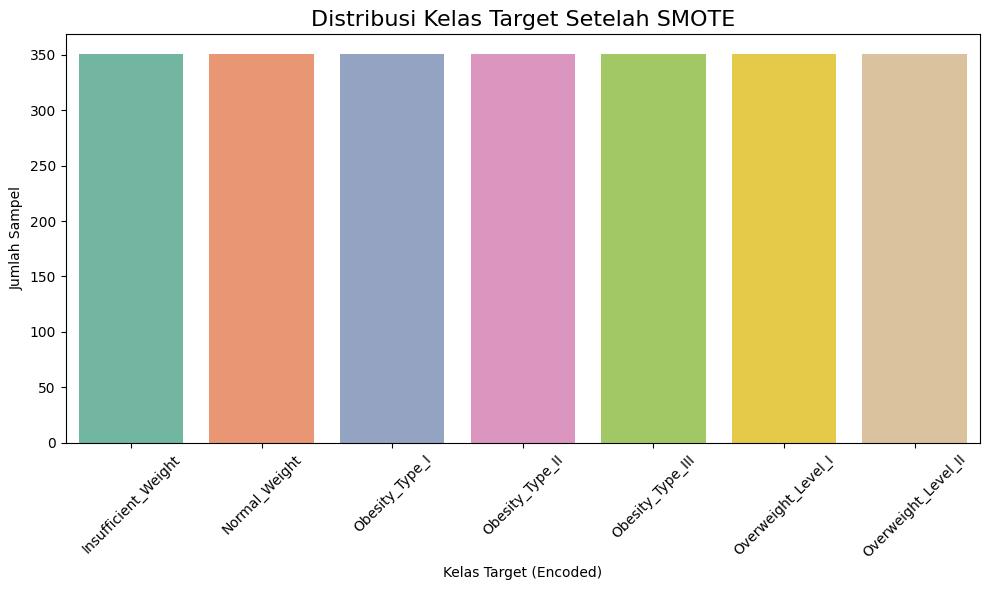

In [23]:
# Visualisasi distribusi kategori target setelah SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_resampled, palette='Set2')
plt.title('Distribusi Kelas Target Setelah SMOTE', fontsize=16)
plt.xlabel('Kelas Target (Encoded)')
plt.ylabel('Jumlah Sampel')
# Change 'label_encoder' to 'le_target' to match the variable name used for target encoding
plt.xticks(ticks=range(len(le_target.classes_)), labels=le_target.classes_, rotation=45)
plt.tight_layout()
plt.show()

## **Normalisasi Data (Min-Max Scaling)**
## Sebagai salah satu langkah akhir dalam persiapan data, dilakukan normalisasi pada fitur-fitur numerik. Tujuannya adalah untuk menyamakan rentang nilai semua fitur tersebut agar tidak ada satu fitur yang mendominasi hanya karena skalanya lebih besar (misalnya, Weight yang bernilai puluhan vs FCVC yang bernilai satuan).

## Metode yang digunakan adalah MinMaxScaler, yang mengubah setiap nilai ke dalam rentang antara 0 hingga 1. Seperti yang ditunjukkan oleh tabel statistik, setelah proses ini, semua fitur numerik kini memiliki nilai minimum 0 dan maksimum 1. Normalisasi ini sangat penting untuk meningkatkan performa dan stabilitas beberapa model machine learning, terutama yang sensitif terhadap skala data.

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['Age', 'Weight', 'Height', 'FAF', 'NCP', 'CH2O', 'FCVC', 'TUE']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [25]:
# Tampilkan beberapa baris pertama dari DataFrame setelah normalisasi
print("\nDataFrame setelah Normalisasi (Kolom Numerik):")
print(df.head())

# Tampilkan deskripsi statistik dari kolom numerik setelah normalisasi
print("\nDeskripsi Statistik Kolom Numerik setelah Normalisasi:")
print(df[numerical_features].describe())


DataFrame setelah Normalisasi (Kolom Numerik):
        Age  Gender    Height    Weight  CALC  FAVC      FCVC    NCP  SCC  \
0  0.333012       0  0.322218  0.189153     3     0  0.285714  0.625    0   
1  0.333012       0  0.132678  0.128624     2     0  0.571429  0.625    1   
2  0.428158       1  0.663390  0.287513     1     0  0.285714  0.625    0   
3  0.618450       1  0.663390  0.363174     1     0  0.571429  0.625    0   
4  0.380585       1  0.625482  0.384360     2     0  0.285714  0.000    0   

   SMOKE      CH2O  family_history_with_overweight       FAF  TUE  CAEC  \
0      0  0.361868                               1  0.000000  0.4     2   
1      1  0.723737                               1  0.747575  0.0     2   
2      0  0.361868                               1  0.498383  0.4     2   
3      0  0.361868                               0  0.498383  0.0     2   
4      0  0.361868                               0  0.000000  0.0     2   

   MTRANS  NObeyesdad  
0       3     

# **Ringkasan Tahapan Pra-pemrosesan Data**
## Secara ringkas, data telah melalui serangkaian proses persiapan untuk memastikan kualitas dan kesiapannya sebelum dimasukkan ke dalam model machine learning. Berikut adalah langkah-langkahnya:

1. ## Pembersihan Data Mendasar: Tahap ini dimulai dengan menangani nilai yang hilang, di mana data kosong pada kolom numerik diisi dengan median (nilai tengah) dan pada kolom kategorikal diisi dengan modus (nilai tersering). Setelah itu, semua data duplikat yang ditemukan juga dihapus untuk memastikan setiap baris data unik.

2. ## Penanganan Outlier: Nilai-nilai ekstrem atau pencilan pada fitur numerik disesuaikan menggunakan metode IQR. Nilai yang berada di luar batas wajar "ditarik" kembali ke dalam rentang data utama, sehingga mengurangi potensi gangguan pada model tanpa harus menghapus data.

3. ## Encoding Fitur: Semua fitur kategorikal yang berbentuk teks diubah menjadi format angka menggunakan LabelEncoder. Proses ini memastikan seluruh data dalam dataset menjadi numerik dan dapat diproses oleh algoritma.

4. ## Penyeimbangan Kelas (Resampling): Untuk mengatasi jumlah data yang tidak merata antar kategori target, teknik SMOTE digunakan. Teknik ini secara cerdas membuat data sintetis untuk kategori minoritas, sehingga semua kelas target memiliki jumlah data yang sama persis dan model dapat belajar secara adil.

5. ## Normalisasi Data: Sebagai langkah akhir, semua fitur numerik dinormalisasi menggunakan MinMaxScaler. Proses ini menyamakan skala semua fitur ke dalam rentang nilai antara 0 dan 1, yang membantu meningkatkan stabilitas dan kecepatan training model.

## Hasil dari semua tahapan ini adalah dataset yang bersih, seimbang, sepenuhnya numerik, dan berskala seragam, yang merupakan kondisi ideal untuk memulai proses pemodelan machine learning.

# **PEMODELAN**

# Pemodelan dan Evaluasi (Modeling & Evaluation)
## Setelah data sepenuhnya siap, tahap pemodelan dimulai untuk melatih dan mengevaluasi beberapa algoritma machine learning guna menemukan mana yang paling cocok untuk kasus ini.

* ## Pemisahan Data: Dataset dibagi menjadi dua bagian: 80% data latih untuk melatih model dan 20% data uji untuk mengukur performanya pada data baru. Proses ini juga memastikan proporsi setiap kelas target tetap seimbang di kedua bagian tersebut.

* ## Pelatihan Model: Enam model klasifikasi berbeda (Decision Tree, Random Forest, Logistic Regression, XGBoost, SVM, KNN) disiapkan. Setiap model "belajar" dari pola yang ada pada data latih. Khusus untuk model yang sensitif terhadap skala nilai seperti Logistic Regression dan SVM, data latihnya dinormalisasi terlebih dahulu.

* ## Evaluasi Performa: Kemampuan setiap model diuji menggunakan data uji. Performanya diukur dengan beberapa metrik utama seperti Accuracy, Precision, Recall, dan F1-Score. Selain itu, dibuat juga Confusion Matrix dan Classification Report untuk analisis yang lebih mendalam mengenai di mana model berhasil dan di mana ia melakukan kesalahan untuk setiap kategori.

* ## Perbandingan dan Visualisasi: Terakhir, semua hasil evaluasi dari keenam model tersebut divisualisasikan dalam bentuk bar plot untuk perbandingan secara langsung. Visualisasi ini mempermudah dalam menentukan model mana yang memiliki performa terbaik secara keseluruhan berdasarkan metrik-metrik yang telah dihitung.

Training Decision Tree...
--> Akurasi Detail untuk Decision Tree: 0.9069 atau 90.69%
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.80      0.82      0.81        57
           2       0.91      0.91      0.91        70
           3       0.98      0.93      0.96        60
           4       0.98      0.97      0.98        65
           5       0.83      0.80      0.81        55
           6       0.89      0.95      0.92        58

    accuracy                           0.91       419
   macro avg       0.91      0.90      0.90       419
weighted avg       0.91      0.91      0.91       419



Training Random Forest...
--> Akurasi Detail untuk Random Forest: 0.9547 atau 95.47%
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.86      0.95     

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:36:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--> Akurasi Detail untuk XGBoost: 0.9642 atau 96.42%
Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       0.93      0.95      0.94        57
           2       0.97      0.99      0.98        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.96      0.89      0.92        55
           6       0.95      0.95      0.95        58

    accuracy                           0.96       419
   macro avg       0.96      0.96      0.96       419
weighted avg       0.96      0.96      0.96       419



Training SVM...
--> Akurasi Detail untuk SVM: 0.8735 atau 87.35%
Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        54
           1       0.70      0.75      0.73        57
           2       0.90      0.91      0.91        7

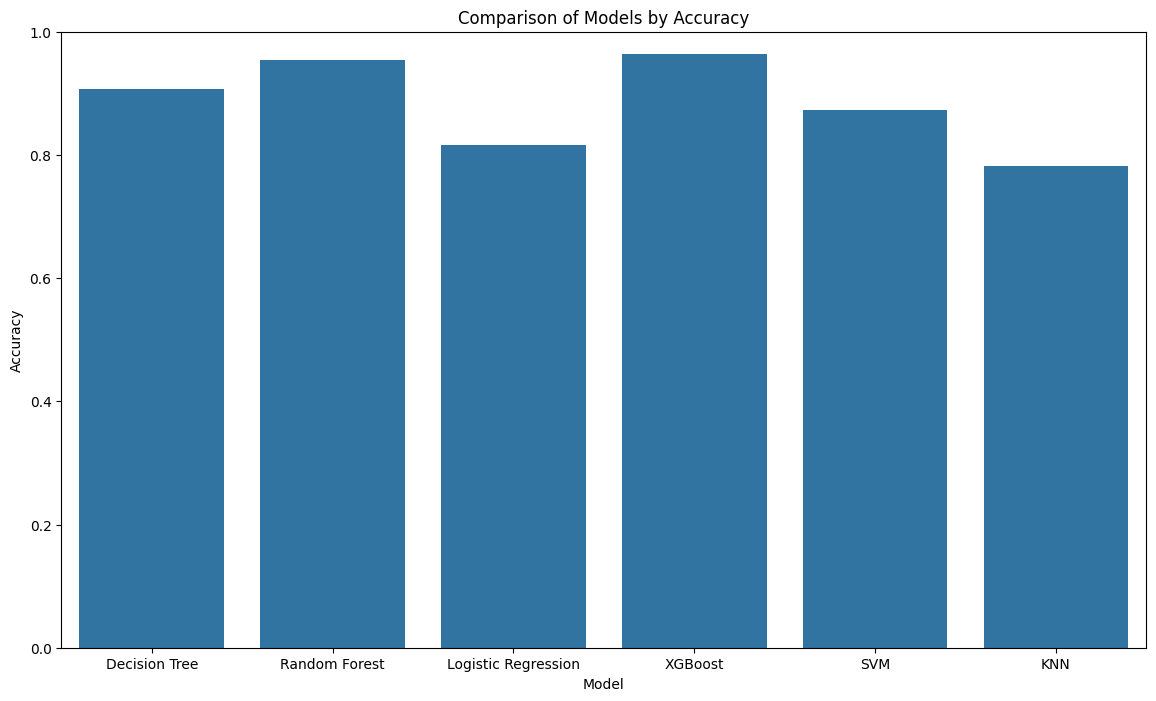

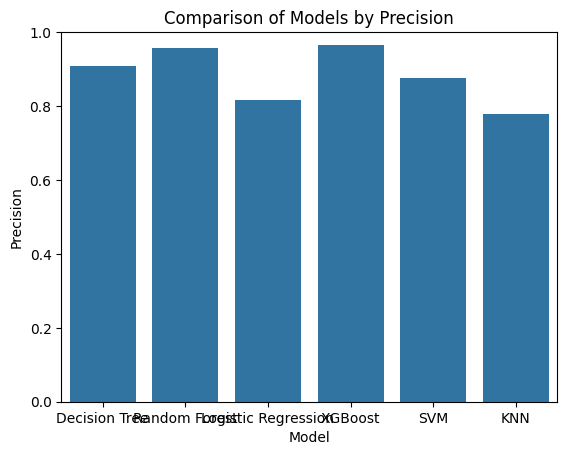

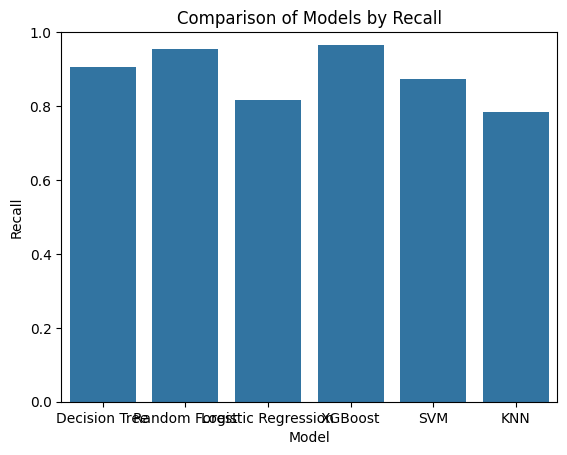

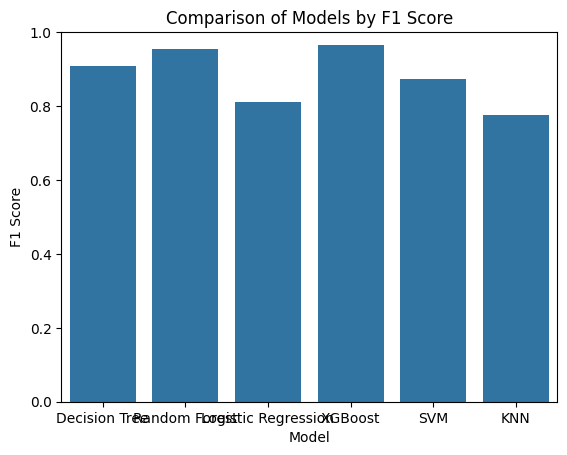

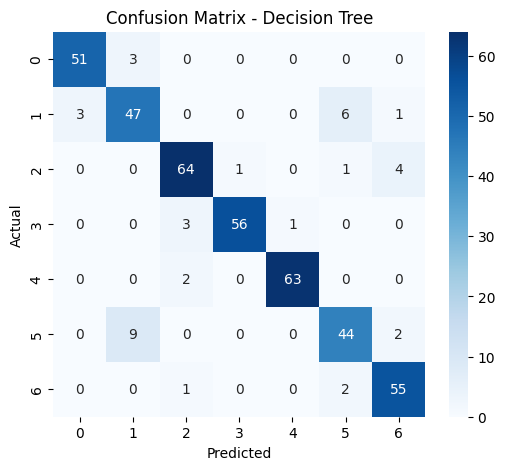

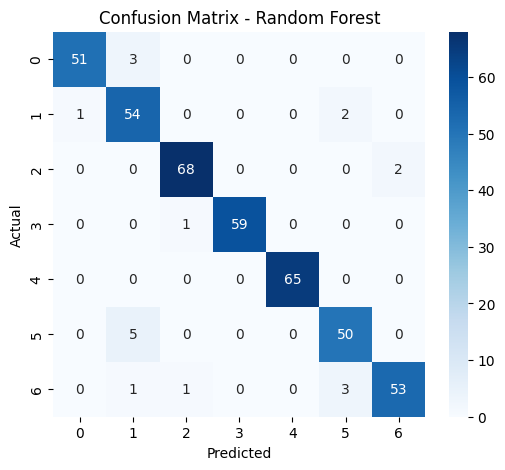

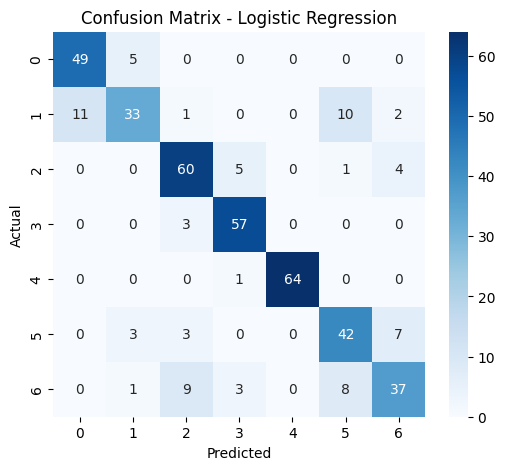

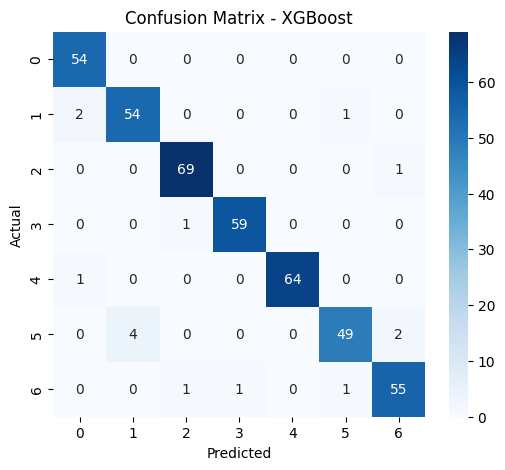

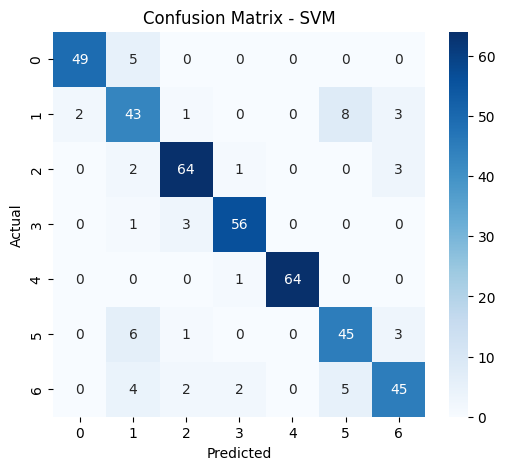

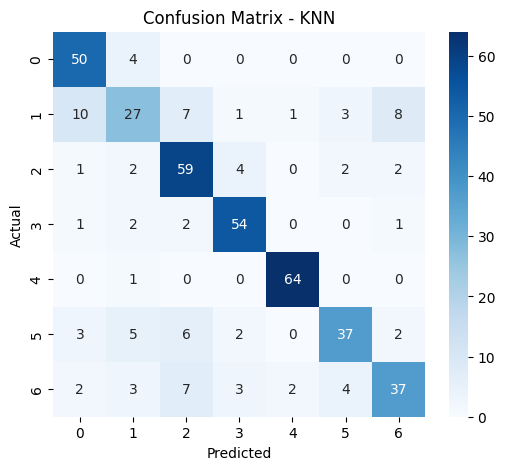

In [26]:
# Pisahkan fitur dan target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split data train-test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling hanya untuk Logistic Regression dan SVM
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definisikan model
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

results = []

# TAMBAHKAN BARIS INI untuk membuat dictionary kosong
trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")

    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # TAMBAHKAN BARIS INI untuk menyimpan model yang sudah dilatih
    trained_models[name] = model

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"--> Akurasi Detail untuk {name}: {acc:.4f} atau {acc:.2%}")

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    })

    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")

# Buat DataFrame hasil
results_df = pd.DataFrame(results)

# Visualisasi perbandingan performa model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(14,8))
for metric in metrics:
    sns.barplot(data=results_df, x='Model', y=metric)
    plt.title(f'Comparison of Models by {metric}')
    plt.ylim(0, 1)
    plt.show()

# Visualisasi confusion matrix
for res in results:
    plt.figure(figsize=(6,5))
    sns.heatmap(res['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {res['Model']}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# **Hyperparameter Tuning XGBoost dan Random Forest**

# **Optimasi Model (Hyperparameter Tuning)**
## Setelah mengetahui performa dasar setiap model, dilakukan upaya untuk meningkatkan akurasi lebih jauh melalui hyperparameter tuning, dengan fokus pada model XGBoost. Proses ini menggunakan RandomizedSearchCV untuk secara efisien mencari kombinasi parameter terbaik dari sebuah daftar yang telah disiapkan secara cermat.

## Pendekatan ini dirancang lebih unggul melalui dua cara:

1. ## Pencarian Menyeluruh: Proses pencarian diatur untuk mencoba 50 kombinasi parameter yang berbeda untuk menemukan kombinasi paling optimal.
2. ## Grid yang Komprehensif: Daftar parameter yang diuji juga menyertakan parameter regularisasi (gamma, reg_alpha, reg_lambda) yang krusial untuk mencegah overfitting (kondisi di mana model terlalu menghafal data latih).

## Setelah proses pencarian selesai, didapatkan set parameter terbaik dan digunakan untuk melatih model XGBoost final. Namun, ketika dievaluasi pada data uji, model yang telah di-tuning ini mencapai akurasi 96.2%. Hasil ini, meskipun sangat tinggi, ternyata sedikit lebih rendah dibandingkan performa model XGBoost dengan parameter default (sebelum tuning) yang mencapai 96.4%. Hal ini menunjukkan bahwa parameter bawaan dari XGBoost sudah sangat kuat dan optimal untuk dataset ini.

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

import numpy as np
import pandas as pd



# Konsistenkan parameter awal dengan model sebelum tuning
# Menambahkan random_state untuk reproduktifitas
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False # Sesuai model awal Anda
)

# --- PERBAIKAN PADA PARAMETER GRID ---
# 1. Rentang nilai diperluas/diperhalus
# 2. Parameter regularisasi (gamma, reg_alpha, reg_lambda) ditambahkan untuk mencegah overfitting
xgb_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.25, 0.5, 1.0], # Parameter regularisasi
    'reg_alpha': [0, 0.1, 0.5, 1],       # L1 Regularization
    'reg_lambda': [1, 1.5, 2, 3]        # L2 Regularization
}

# --- PERBAIKAN PADA JUMLAH ITERASI ---
# n_iter ditingkatkan dari 10 ke 50 untuk pencarian yang lebih menyeluruh
# Semakin tinggi nilainya, semakin lama prosesnya, tapi kemungkinan menemukan hasil baik lebih besar
xgb_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=xgb_params,
    cv=3,
    n_iter=50, # Ditingkatkan dari 10
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Memulai Hyperparameter Tuning untuk XGBoost dengan parameter grid yang lebih baik...")
xgb_search.fit(X_train, y_train)

# --- Evaluasi Hasil Terbaik ---
print("\nParameter terbaik yang ditemukan:")
print(xgb_search.best_params_)

best_xgb = xgb_search.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)

print("\nAkurasi XGBoost Setelah Tuning (diperbaiki):", accuracy_score(y_test, y_pred_xgb_tuned))
print("\nLaporan Klasifikasi XGBoost (diperbaiki):")
print(classification_report(y_test, y_pred_xgb_tuned))


Memulai Hyperparameter Tuning untuk XGBoost dengan parameter grid yang lebih baik...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:40:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Parameter terbaik yang ditemukan:
{'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}

Akurasi XGBoost Setelah Tuning (diperbaiki): 0.9618138424821002

Laporan Klasifikasi XGBoost (diperbaiki):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.89      0.96      0.92        57
           2       0.97      0.97      0.97        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.94      0.89      0.92        55
           6       0.95      0.95      0.95        58

    accuracy                           0.96       419
   macro avg       0.96      0.96      0.96       419
weighted avg       0.96      0.96      0.96       419



# **Optimasi Model (Hyperparameter Tuning Random Forest)**
## Selain XGBoost, optimasi serupa juga dilakukan pada model Random Forest untuk mencari kombinasi parameter terbaiknya. Proses ini juga menggunakan RandomizedSearchCV untuk mencoba 10 kombinasi parameter yang berbeda secara acak.

## Parameter yang dioptimalkan meliputi jumlah pohon dalam forest (n_estimators), kedalaman maksimum setiap pohon (max_depth), serta aturan untuk membelah dan membentuk daun pada pohon (min_samples_split & min_samples_leaf). Setelah pencarian selesai, kombinasi parameter terbaik digunakan untuk melatih model Random Forest final, yang kemudian dievaluasi performanya pada data uji.

In [30]:
rf_model = RandomForestClassifier()

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_search = RandomizedSearchCV(rf_model, rf_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Tuned Random Forest Accuracy: 0.9570405727923628
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.85      0.98      0.91        57
           2       0.97      0.97      0.97        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.94      0.91      0.93        55
           6       0.96      0.91      0.94        58

    accuracy                           0.96       419
   macro avg       0.96      0.96      0.96       419
weighted avg       0.96      0.96      0.96       419



# Perbandingan Performa Akhir
## Sebagai tahap evaluasi final, dilakukan perbandingan langsung untuk melihat dampak dari proses hyperparameter tuning. Skor Akurasi dan F1-Score dari model Random Forest dan XGBoost sebelum dan sesudah di-tuning divisualisasikan secara berdampingan dalam sebuah bar plot.

## Visualisasi ini dengan jelas menunjukkan bahwa:

* ## Random Forest: Mengalami sedikit peningkatan performa setelah di-tuning.
* ## XGBoost: Model dengan parameter bawaan (sebelum tuning) ternyata tetap sedikit lebih unggul dibandingkan versi yang telah di-tuning.

## Langkah ini krusial untuk validasi akhir, membantu dalam memutuskan model mana beserta konfigurasinya (bawaan atau hasil tuning) yang akan dipilih sebagai model terbaik untuk menyelesaikan kasus ini.



Mengambil skor performa model sebelum hyperparameter tuning...
Akurasi Random Forest & XGBoost (sebelum): [0.954653937947494, 0.964200477326969]
F1-Score Random Forest & XGBoost (sebelum): [0.9550480718765842, 0.9640257619470237]
Akurasi Random Forest & XGBoost (sesudah): [0.9570405727923628, 0.9618138424821002]
F1-Score Random Forest & XGBoost (sesudah): [0.9574931529775961, 0.961944701088994]

Membuat plot perbandingan...


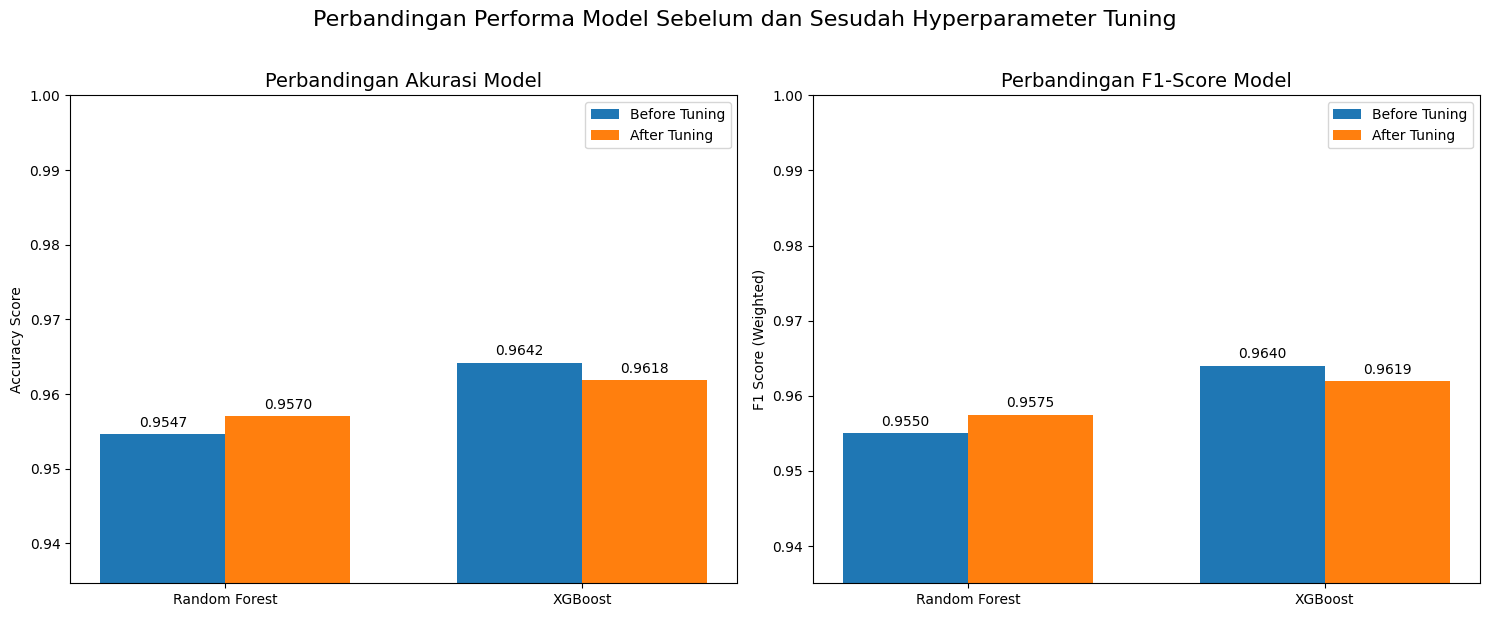

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Asumsi Anda sudah memiliki variabel-variabel berikut:
# results_df, y_test, y_pred_rf_tuned, y_pred_xgb_tuned

# --- Mengambil nilai "sebelum" secara dinamis ---
print("Mengambil skor performa model sebelum hyperparameter tuning...")
model_names = ['Random Forest', 'XGBoost']
accuracy_before = results_df[results_df['Model'].isin(model_names)]['Accuracy'].tolist()
f1_before = results_df[results_df['Model'].isin(model_names)]['F1 Score'].tolist()

print(f"Akurasi Random Forest & XGBoost (sebelum): {accuracy_before}")
print(f"F1-Score Random Forest & XGBoost (sebelum): {f1_before}")


# --- Menghitung nilai "sesudah" ---
accuracy_after = [accuracy_score(y_test, y_pred_rf_tuned), accuracy_score(y_test, y_pred_xgb_tuned)]
f1_after = [f1_score(y_test, y_pred_rf_tuned, average='weighted'), f1_score(y_test, y_pred_xgb_tuned, average='weighted')]

# ======================================================================
# --- TAMBAHKAN PRINT STATEMENT DI SINI ---
print(f"Akurasi Random Forest & XGBoost (sesudah): {accuracy_after}")
print(f"F1-Score Random Forest & XGBoost (sesudah): {f1_after}")
# ======================================================================


# --- Kode Plotting ---
print("\nMembuat plot perbandingan...")
x = np.arange(len(model_names))
width = 0.35
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy Plot
rects1 = ax[0].bar(x - width/2, accuracy_before, width, label='Before Tuning')
rects2 = ax[0].bar(x + width/2, accuracy_after, width, label='After Tuning')
ax[0].set_title('Perbandingan Akurasi Model', fontsize=14)
ax[0].set_ylabel('Accuracy Score')
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names)
ax[0].legend()
ax[0].set_ylim(min(min(accuracy_before), min(accuracy_after)) - 0.02, 1.0)
ax[0].bar_label(rects1, padding=3, fmt='%.4f')
ax[0].bar_label(rects2, padding=3, fmt='%.4f')


# F1 Score Plot
rects3 = ax[1].bar(x - width/2, f1_before, width, label='Before Tuning')
rects4 = ax[1].bar(x + width/2, f1_after, width, label='After Tuning')
ax[1].set_title('Perbandingan F1-Score Model', fontsize=14)
ax[1].set_ylabel('F1 Score (Weighted)')
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names)
ax[1].legend()
ax[1].set_ylim(min(min(f1_before), min(f1_after)) - 0.02, 1.0)
ax[1].bar_label(rects3, padding=3, fmt='%.4f')
ax[1].bar_label(rects4, padding=3, fmt='%.4f')

plt.suptitle('Perbandingan Performa Model Sebelum dan Sesudah Hyperparameter Tuning', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# **Penyimpanan Model Terbaik (Model Persistence)**
## Sebagai langkah terakhir, model-model dengan performa terbaik dari hasil evaluasi disimpan ke dalam file. Tujuannya agar model tersebut dapat digunakan kembali di masa depan untuk melakukan prediksi pada data baru tanpa perlu mengulang seluruh proses training dari awal.

## Berdasarkan perbandingan yang telah dilakukan:

* ## Random Forest: Model yang disimpan adalah versi setelah di-tuning (best_rf), karena terbukti memberikan performa yang lebih baik.
* ## XGBoost: Sebaliknya, model yang disimpan adalah versi sebelum di-tuning (trained_models['XGBoost']), karena parameter default-nya menghasilkan akurasi yang lebih tinggi.

## Kedua model ini disimpan dalam format file .pkl menggunakan joblib, sehingga siap untuk diimplementasikan atau di-deploy pada aplikasi lain.

In [33]:
import joblib
import os

# Define the path to save the model in Google Drive
model_save_path = '/content/drive/MyDrive/BengKod_Tuned_RandomForest_Model.pkl' # Ganti nama file jika perlu

# Save the best Random Forest model
joblib.dump(best_rf, model_save_path)

print(f"Model Tuned Random Forest berhasil disimpan di: {model_save_path}")

# Definisikan path untuk model XGBoost non-hypertuning
model_save_path_xgb = '/content/drive/MyDrive/BengKod_Default_XGBoost_Model.pkl'

# Ambil model XGBoost dari dictionary dan simpan
# Ganti 'best_xgb' dengan model yang kita ambil dari 'trained_models'
joblib.dump(trained_models['XGBoost'], model_save_path_xgb)

print(f"Model Default XGBoost berhasil disimpan di: {model_save_path_xgb}")


Model Tuned Random Forest berhasil disimpan di: /content/drive/MyDrive/BengKod_Tuned_RandomForest_Model.pkl
Model Default XGBoost berhasil disimpan di: /content/drive/MyDrive/BengKod_Default_XGBoost_Model.pkl


# **Persiapan Artefak untuk Deployment**
## Sebagai persiapan akhir untuk proses deployment (misalnya pada aplikasi Streamlit), dua komponen pendukung yang krusial juga disimpan selain model itu sendiri:

* ## Penyimpanan Label Encoder: Objek LabelEncoder untuk variabel target disimpan. Ini sangat penting agar aplikasi nantinya bisa menerjemahkan hasil prediksi model yang berupa angka (contoh: 0, 1, 2) kembali menjadi teks yang dapat dimengerti pengguna (contoh: Insufficient_Weight, Normal_Weight, Obesity_Type_I).

* ## Penyimpanan Urutan Kolom Fitur: Daftar nama dan urutan kolom fitur yang digunakan saat melatih model juga disimpan. Ini adalah langkah kritis untuk memastikan data input baru pada aplikasi memiliki format yang sama persis seperti yang diharapkan oleh model, sehingga mencegah terjadinya eror saat prediksi.

## Dengan menyimpan kedua artefak ini, Anda memastikan bahwa semua komponen yang diperlukan untuk menjalankan model di lingkungan lain telah siap, membuat proses deployment menjadi lebih andal.

In [ ]:
import joblib
import pandas as pd

nama_variabel_label_encoder = le_target
nama_variabel_fitur = X_train
# -----------------------------------------

# 1. Menyimpan Label Encoder
# Ini akan menyimpan pemetaan dari "Insufficient_Weight" -> 0, "Normal_Weight" -> 1, dst.
try:
    joblib.dump(nama_variabel_label_encoder, '/content/drive/MyDrive/label_encoder.pkl')
    print("✅ File 'label_encoder.pkl' berhasil disimpan di Google Drive.")
except NameError:
    print("❌ Gagal: Variabel untuk Label Encoder tidak ditemukan. Periksa nama variabelnya.")


# 2. Menyimpan Urutan Kolom Model
# Ini SANGAT PENTING agar urutan fitur saat prediksi sama dengan saat training.
try:
    model_columns = list(nama_variabel_fitur.columns)
    joblib.dump(model_columns, '/content/drive/MyDrive/model_columns.pkl')
    print(f"✅ File 'model_columns.pkl' berhasil disimpan. Jumlah kolom: {len(model_columns)}")
except NameError:
    print("❌ Gagal: Variabel untuk DataFrame fitur tidak ditemukan. Periksa nama variabelnya.")

✅ File 'label_encoder.pkl' berhasil disimpan di Google Drive.
✅ File 'model_columns.pkl' berhasil disimpan. Jumlah kolom: 16


In [ ]:
# ==============================================================================
# SEL FINAL UNTUK MENGHASILKAN ASET DEPLOYMENT (VERSI OTOMATIS)
# ==============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import os

# --- 1. TENTUKAN LOKASI PENYIMPANAN DI GOOGLE DRIVE ---
save_path = '/content/drive/MyDrive/Bengkod/'

# Membuat folder jika belum ada (praktik terbaik)
os.makedirs(save_path, exist_ok=True)

print(f"Semua aset akan disimpan di: {save_path}")
print("="*80)


# --- 2. MEMBUAT DAN MENYIMPAN GAMBAR LAPORAN KLASIFIKASI ---

print("Membuat gambar dari Laporan Klasifikasi...")

# Pastikan variabel ini ada: best_xgb, X_test, y_test, le (LabelEncoder)
y_pred_final = best_xgb.predict(X_test)
# Use 'label_encoder' instead of 'le'
# FIX: Use the correct variable name le_target instead of label_encoder
report_text = classification_report(y_test, y_pred_final, target_names=le_target.classes_)

# Membuat plot teks
fig, ax = plt.subplots(figsize=(10, 8))
ax.text(0.05, 0.95, report_text,
        horizontalalignment='left',
        verticalalignment='top',
        family='monospace', # Font yang bagus untuk teks kode
        fontsize=12)
ax.axis('off') # Matikan sumbu x dan y
ax.set_title('Classification Report - Model XGBoost', fontsize=16, pad=20)

# Simpan gambar ke G-Drive
report_image_path = os.path.join(save_path, 'classification_report.png')
try:
    plt.savefig(report_image_path, dpi=300, bbox_inches='tight')
    print(f"✅ SUKSES: Gambar laporan disimpan di: {report_image_path}")
except Exception as e:
    print(f"❌ GAGAL menyimpan gambar laporan. Error: {e}")

plt.close() # Tutup plot agar tidak tampil di notebook


# --- 3. MEMBUAT DAN MENYIMPAN GAMBAR FEATURE IMPORTANCE ---

print("\nMembuat gambar Feature Importance...")

# Membuat plot
fig, ax = plt.subplots(figsize=(12, 8))
# Ensure best_xgb.feature_names_in_ exists or use X_test.columns if needed
try:
    feature_names = best_xgb.feature_names_in_
except AttributeError:
    # Fallback if feature_names_in_ is not available (older XGBoost versions)
    print("Warning: 'feature_names_in_' not found. Using X_test columns as feature names.")
    feature_names = X_test.columns.tolist()


importances = best_xgb.feature_importances_

importance_df = pd.DataFrame({'Features': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Features', data=importance_df, palette='viridis', ax=ax)
ax.set_title('Pentingnya Fitur (Feature Importance) - Model XGBoost', fontsize=16)
ax.set_xlabel('Skor Kepentingan', fontsize=12)
ax.set_ylabel('Fitur', fontsize=12)

# Simpan gambar ke G-Drive
importance_image_path = os.path.join(save_path, 'feature_importance.png')
try:
    plt.savefig(importance_image_path, dpi=150, bbox_inches='tight')
    print(f"✅ SUKSES: Gambar feature importance disimpan di: {importance_image_path}")
except Exception as e:
    print(f"❌ GAGAL menyimpan gambar feature importance. Error: {e}")

plt.close() # Tutup plot agar tidak tampil di notebook

print("\n" + "="*80)
print("Semua aset gambar telah dibuat di folder Google Drive Anda.")

Semua aset akan disimpan di: /content/drive/MyDrive/Bengkod/
Membuat gambar dari Laporan Klasifikasi...
✅ SUKSES: Gambar laporan disimpan di: /content/drive/MyDrive/Bengkod/classification_report.png

Membuat gambar Feature Importance...


<ipython-input-63-3227861864>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Features', data=importance_df, palette='viridis', ax=ax)


✅ SUKSES: Gambar feature importance disimpan di: /content/drive/MyDrive/Bengkod/feature_importance.png

Semua aset gambar telah dibuat di folder Google Drive Anda.


In [ ]:
# Pastikan variabel df_encoded sudah ada dari sel sebelumnya

# Simpan DataFrame ke file CSV
df.to_csv('data_encoded.csv', index=False) # Change df_encoded to df

print("✅ SUKSES: File 'data_encoded.csv' berhasil dibuat!")
print("Anda sekarang bisa men-download file ini dari panel file di sebelah kiri Colab.")

✅ SUKSES: File 'data_encoded.csv' berhasil dibuat!
Anda sekarang bisa men-download file ini dari panel file di sebelah kiri Colab.


In [ ]:
# Impor library yang mungkin belum ada di sel ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression # Impor LogisticRegression

# ==================== PERUBAHAN DIMULAI DI SINI ====================

# 1. Pisahkan fitur dan target (seperti sebelumnya)
# X should be derived from df_encoded which was the result of drop_first=True
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

# 2. Definisikan fitur yang sudah Anda pilih dari analisis korelasi
# Keep the original list derived from correlation
selected_features_from_corr = ['Weight', 'CAEC_Frequently', 'CAEC_Sometimes', 'family_history_with_overweight_no', 'family_history_with_overweight_yes', 'Age']

# 3. Filter selected_features_from_corr to only include columns that exist in X
# This ensures we don't try to select columns dropped by drop_first=True
selected_features = [feature for feature in selected_features_from_corr if feature in X.columns]

print(f"Original selected features from correlation: {selected_features_from_corr}")
print(f"Filtered selected features (present in X): {selected_features}")
print(f"Memfilter data untuk menggunakan {len(selected_features)} fitur terpilih...")

# 4. Buat DataFrame BARU yang HANYA berisi fitur-fitur pilihan
X_selected = X[selected_features]

# 5. Split data yang SUDAH DIFILTER menjadi data train-test (80-20)
X_train_sel, X_test_sel, y_train, y_test = train_test_split(
    X_selected, # <-- Gunakan data yang sudah difilter
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Data berhasil dibagi menjadi data training dan testing.")

# 6. Scaling pada data yang sudah difilter (hanya untuk model tertentu)
scaler = StandardScaler()
X_train_scaled_sel = scaler.fit_transform(X_train_sel)
X_test_scaled_sel = scaler.transform(X_test_sel)
print("Standard scaling selesai.")

# ==================== AKHIR DARI PERUBAHAN INTI ====================


# Definisikan model (tidak ada perubahan di sini)
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

results = []

# --- Loop Training Menggunakan Variabel Baru ---
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Gunakan data yang sudah distandardisasi dan difilter hanya untuk model tertentu
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled_sel, y_train) # <-- Gunakan data scaled yang baru
        y_pred = model.predict(X_test_scaled_sel)
    else:
        # Gunakan data asli yang sudah difilter untuk model berbasis tree
        model.fit(X_train_sel, y_train) # <-- Gunakan data non-scaled yang baru
        y_pred = model.predict(X_test_sel)

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    })

    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")

# Buat DataFrame hasil
results_df = pd.DataFrame(results)

# Visualisasi perbandingan performa model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(14,8))
for metric in metrics:
    sns.barplot(data=results_df, x='Model', y=metric)
    plt.title(f'Comparison of Models by {metric} (Using Selected Features)')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

# Visualisasi confusion matrix
for res in results:
    plt.figure(figsize=(6,5))
    sns.heatmap(res['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {res['Model']} (Selected Features)")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()